In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")


# 一、加载数据并清洗数据

In [3]:
headers = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','class'] 
training_raw = pd.read_csv('dataset/adult.data',header=None,names=headers,sep=',\s',na_values=["?"],engine='python')
test_raw = pd.read_csv('dataset/adult.test',header=None,names=headers,sep=',\s',na_values=["?"],engine='python')
dataset_raw = training_raw.append(test_raw)
dataset_raw.reset_index(inplace=True)
dataset_raw.drop('index',inplace=True,axis=1)
dataset_raw=dataset_raw.dropna() #删除缺失值
dataset_raw.loc[dataset_raw["class"]=='<=50K.','class']='<=50K'
dataset_raw.loc[dataset_raw["class"]=='>50K.','class']='>50K'
dataset_raw.head()
print(dataset_raw.info())
print(dataset_raw['class'].value_counts())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45222 entries, 0 to 48842
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             45222 non-null  object 
 1   workclass       45222 non-null  object 
 2   fnlwgt          45222 non-null  float64
 3   education       45222 non-null  object 
 4   education-num   45222 non-null  float64
 5   marital-status  45222 non-null  object 
 6   occupation      45222 non-null  object 
 7   relationship    45222 non-null  object 
 8   race            45222 non-null  object 
 9   sex             45222 non-null  object 
 10  capital-gain    45222 non-null  float64
 11  capital-loss    45222 non-null  float64
 12  hours-per-week  45222 non-null  float64
 13  native-country  45222 non-null  object 
 14  class           45222 non-null  object 
dtypes: float64(5), object(10)
memory usage: 5.5+ MB
None
<=50K    34014
>50K     11208
Name: class, dtype: int64


# 二、数据探索

## 1.公共函数代码

In [4]:
import math
#可视化函数
def plot_distribution(dataset,cols=5,width=40,height=40,hspace=0.2,wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=wspace,hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i,column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows,cols,i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object:
            g = sns.countplot(y=column,data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.rcParams['savefig.dpi'] = 1200 #图片像素
            plt.rcParams['figure.dpi'] = 1200 #分辨率
            plt.xticks(rotation=25)
        else:
            # g = sns.histplot(dataset[column],kde=True,stat='density')
            g = sns.distplot(dataset[column],kde=True)
            plt.rcParams['savefig.dpi'] = 1200 #图片像素
            plt.rcParams['figure.dpi'] = 1200 #分辨率
            plt.xticks(rotation=25)

## 2.对age、sex、relationship的探索

                age
count  45222.000000
mean      38.547941
std       13.217870
min       17.000000
25%       28.000000
50%       37.000000
75%       47.000000
max       90.000000


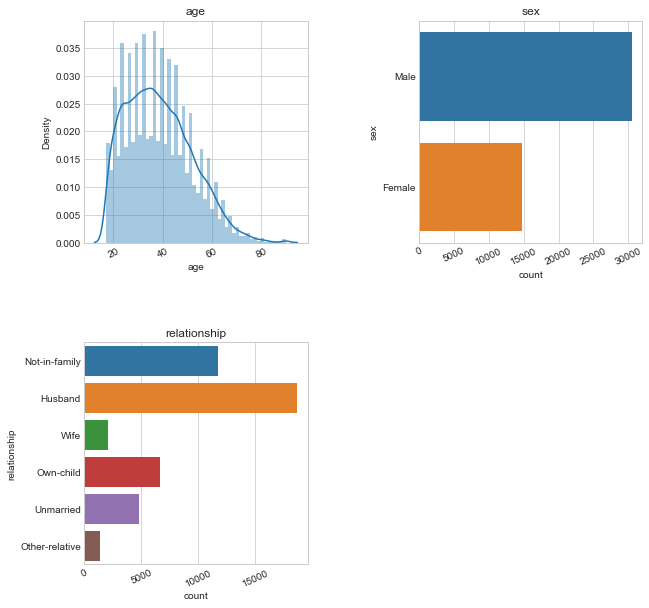

In [5]:
#单特征展示
df = dataset_raw[["age","sex","relationship"]];
df.loc[:,"age"] = df.loc[:,"age"].astype(int)
# df["age"]=df["age"].astype(int)
print(df.describe())
plot_distribution(df,cols=2,width=10,height=10,hspace=0.45,wspace=0.5)

## 2.对workclass、occupation、hours_per_week的探索

In [6]:
df = dataset_raw[["workclass","occupation","hours-per-week"]];
print(df.describe())
plot_distribution(df,cols=2,width=10,height=10,hspace=0.45,wspace=0.5)


       hours-per-week
count    45222.000000
mean        40.938017
std         12.007508
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000


## 3.对capital-loss、capital-gain、race探索

       capital-gain  capital-loss
count  45222.000000  45222.000000
mean    1101.430344     88.595418
std     7506.430084    404.956092
min        0.000000      0.000000
25%        0.000000      0.000000
50%        0.000000      0.000000
75%        0.000000      0.000000
max    99999.000000   4356.000000


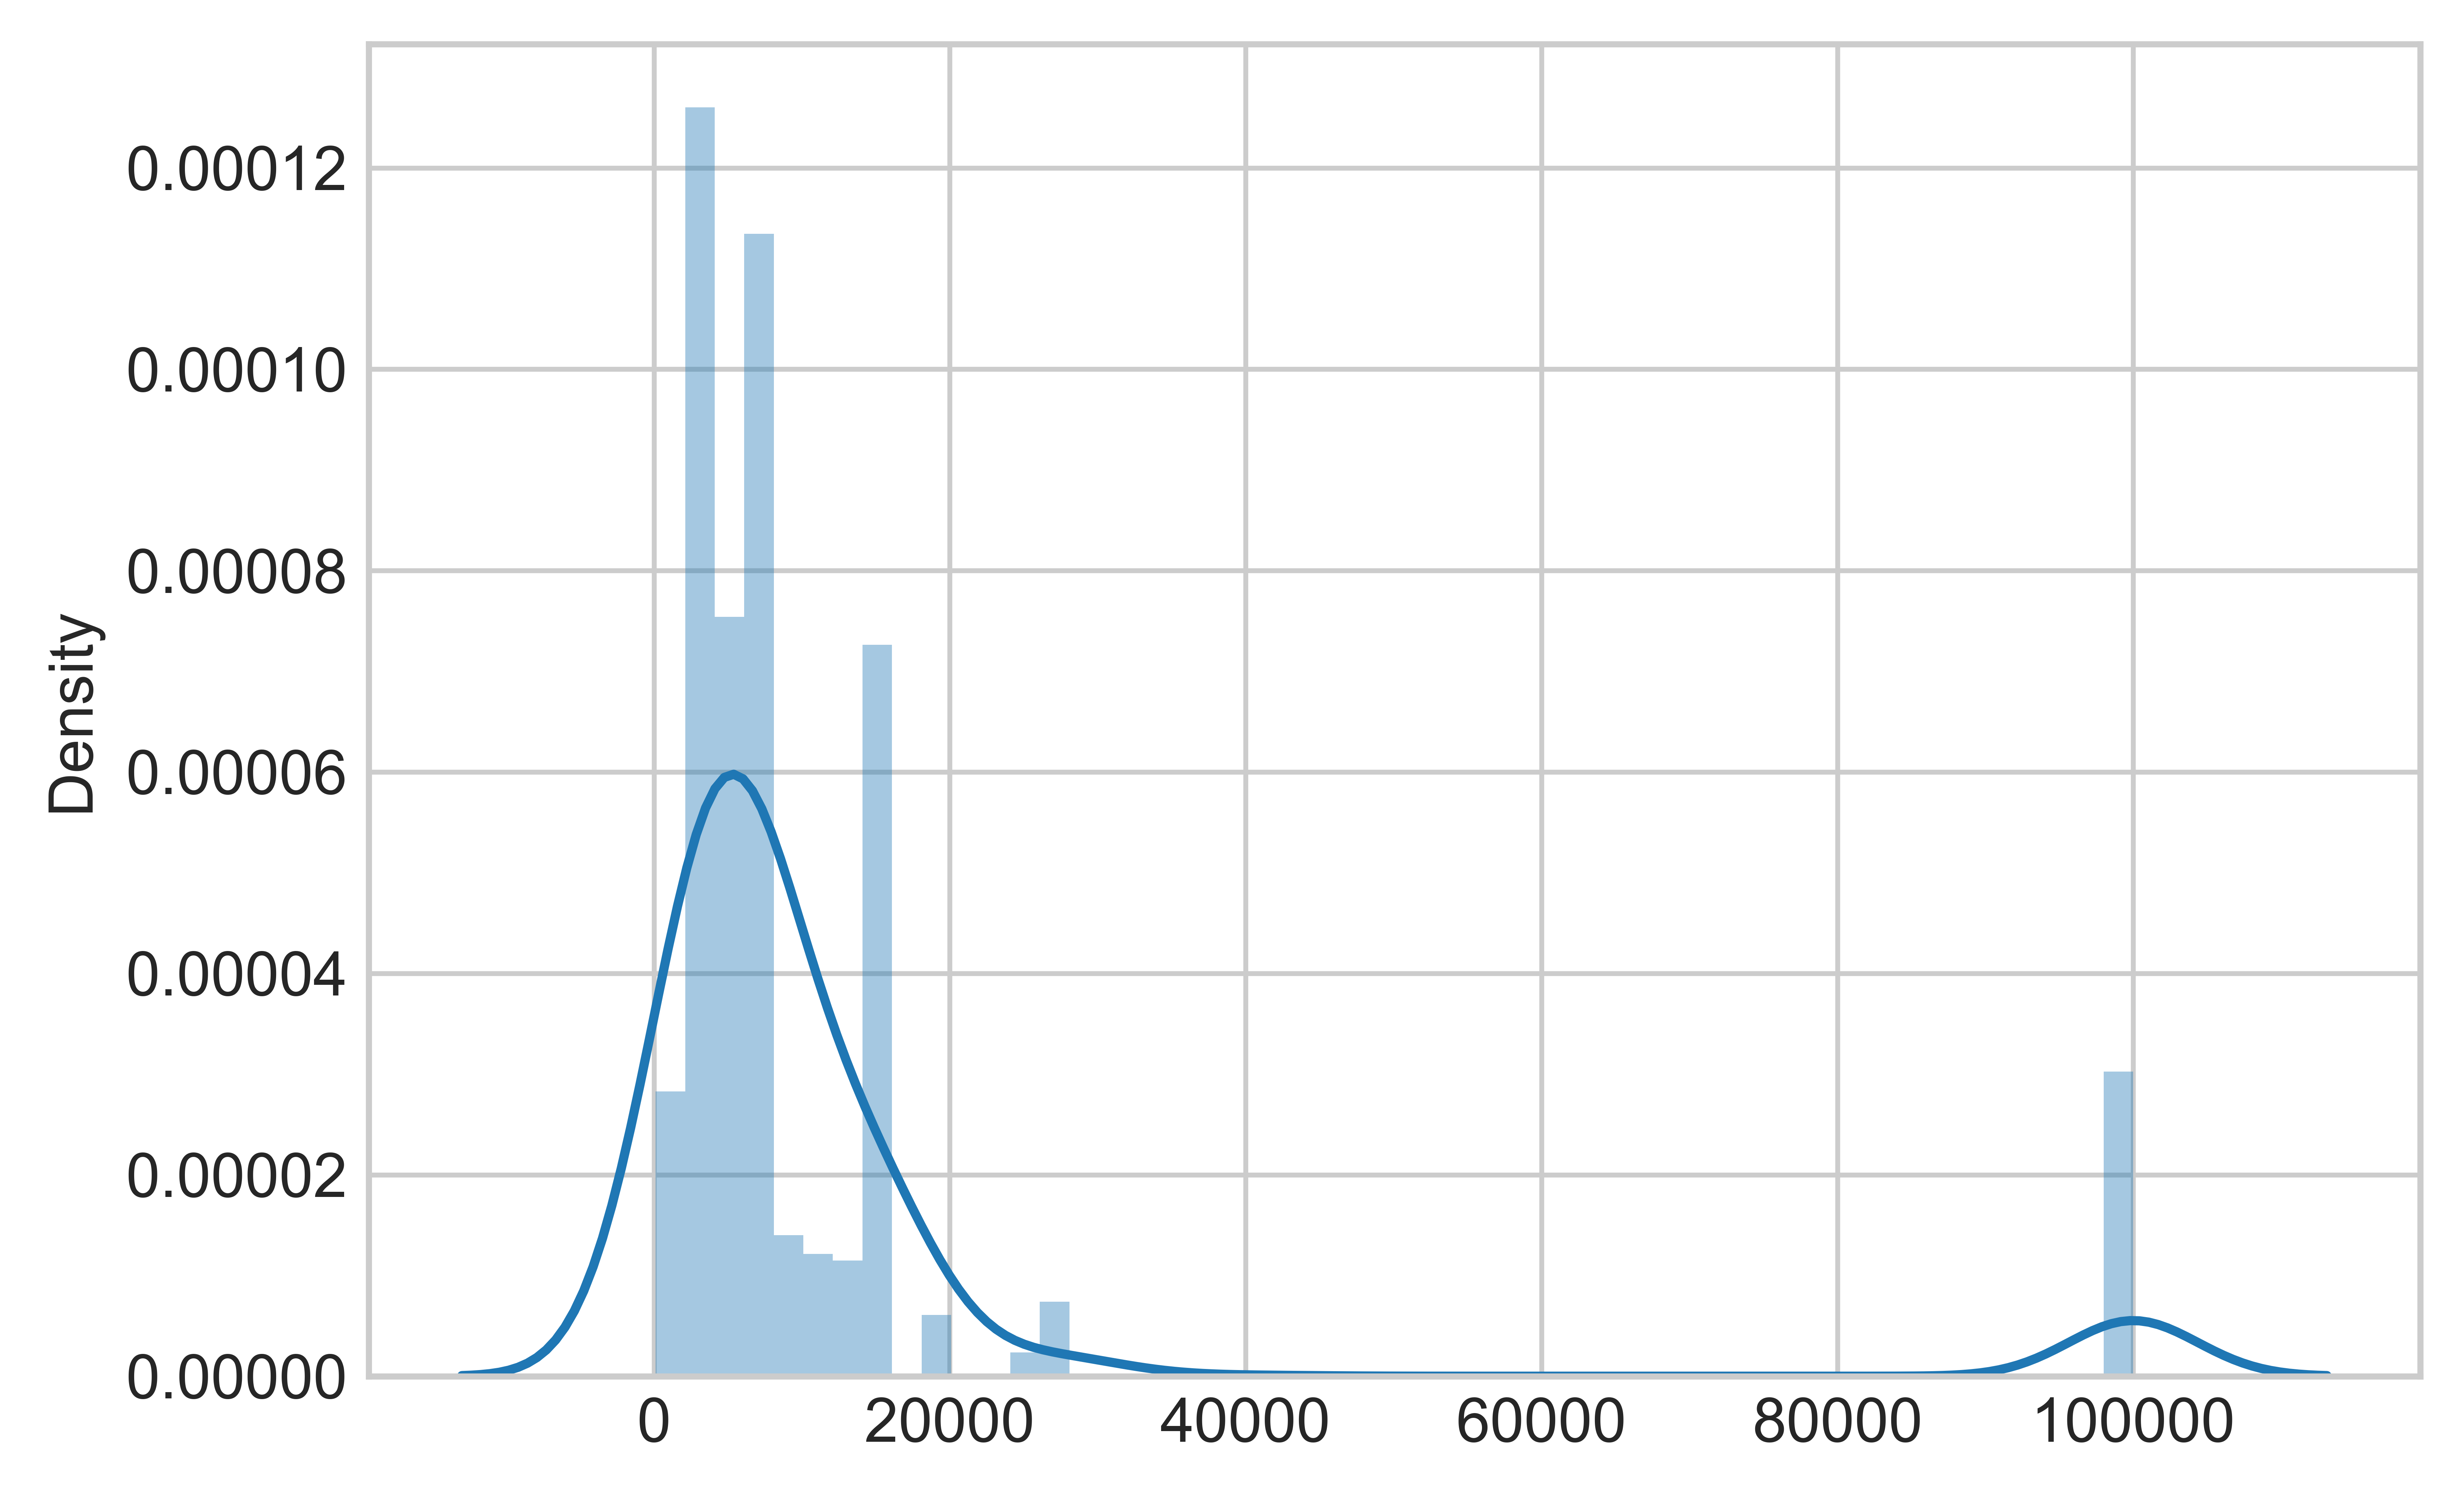

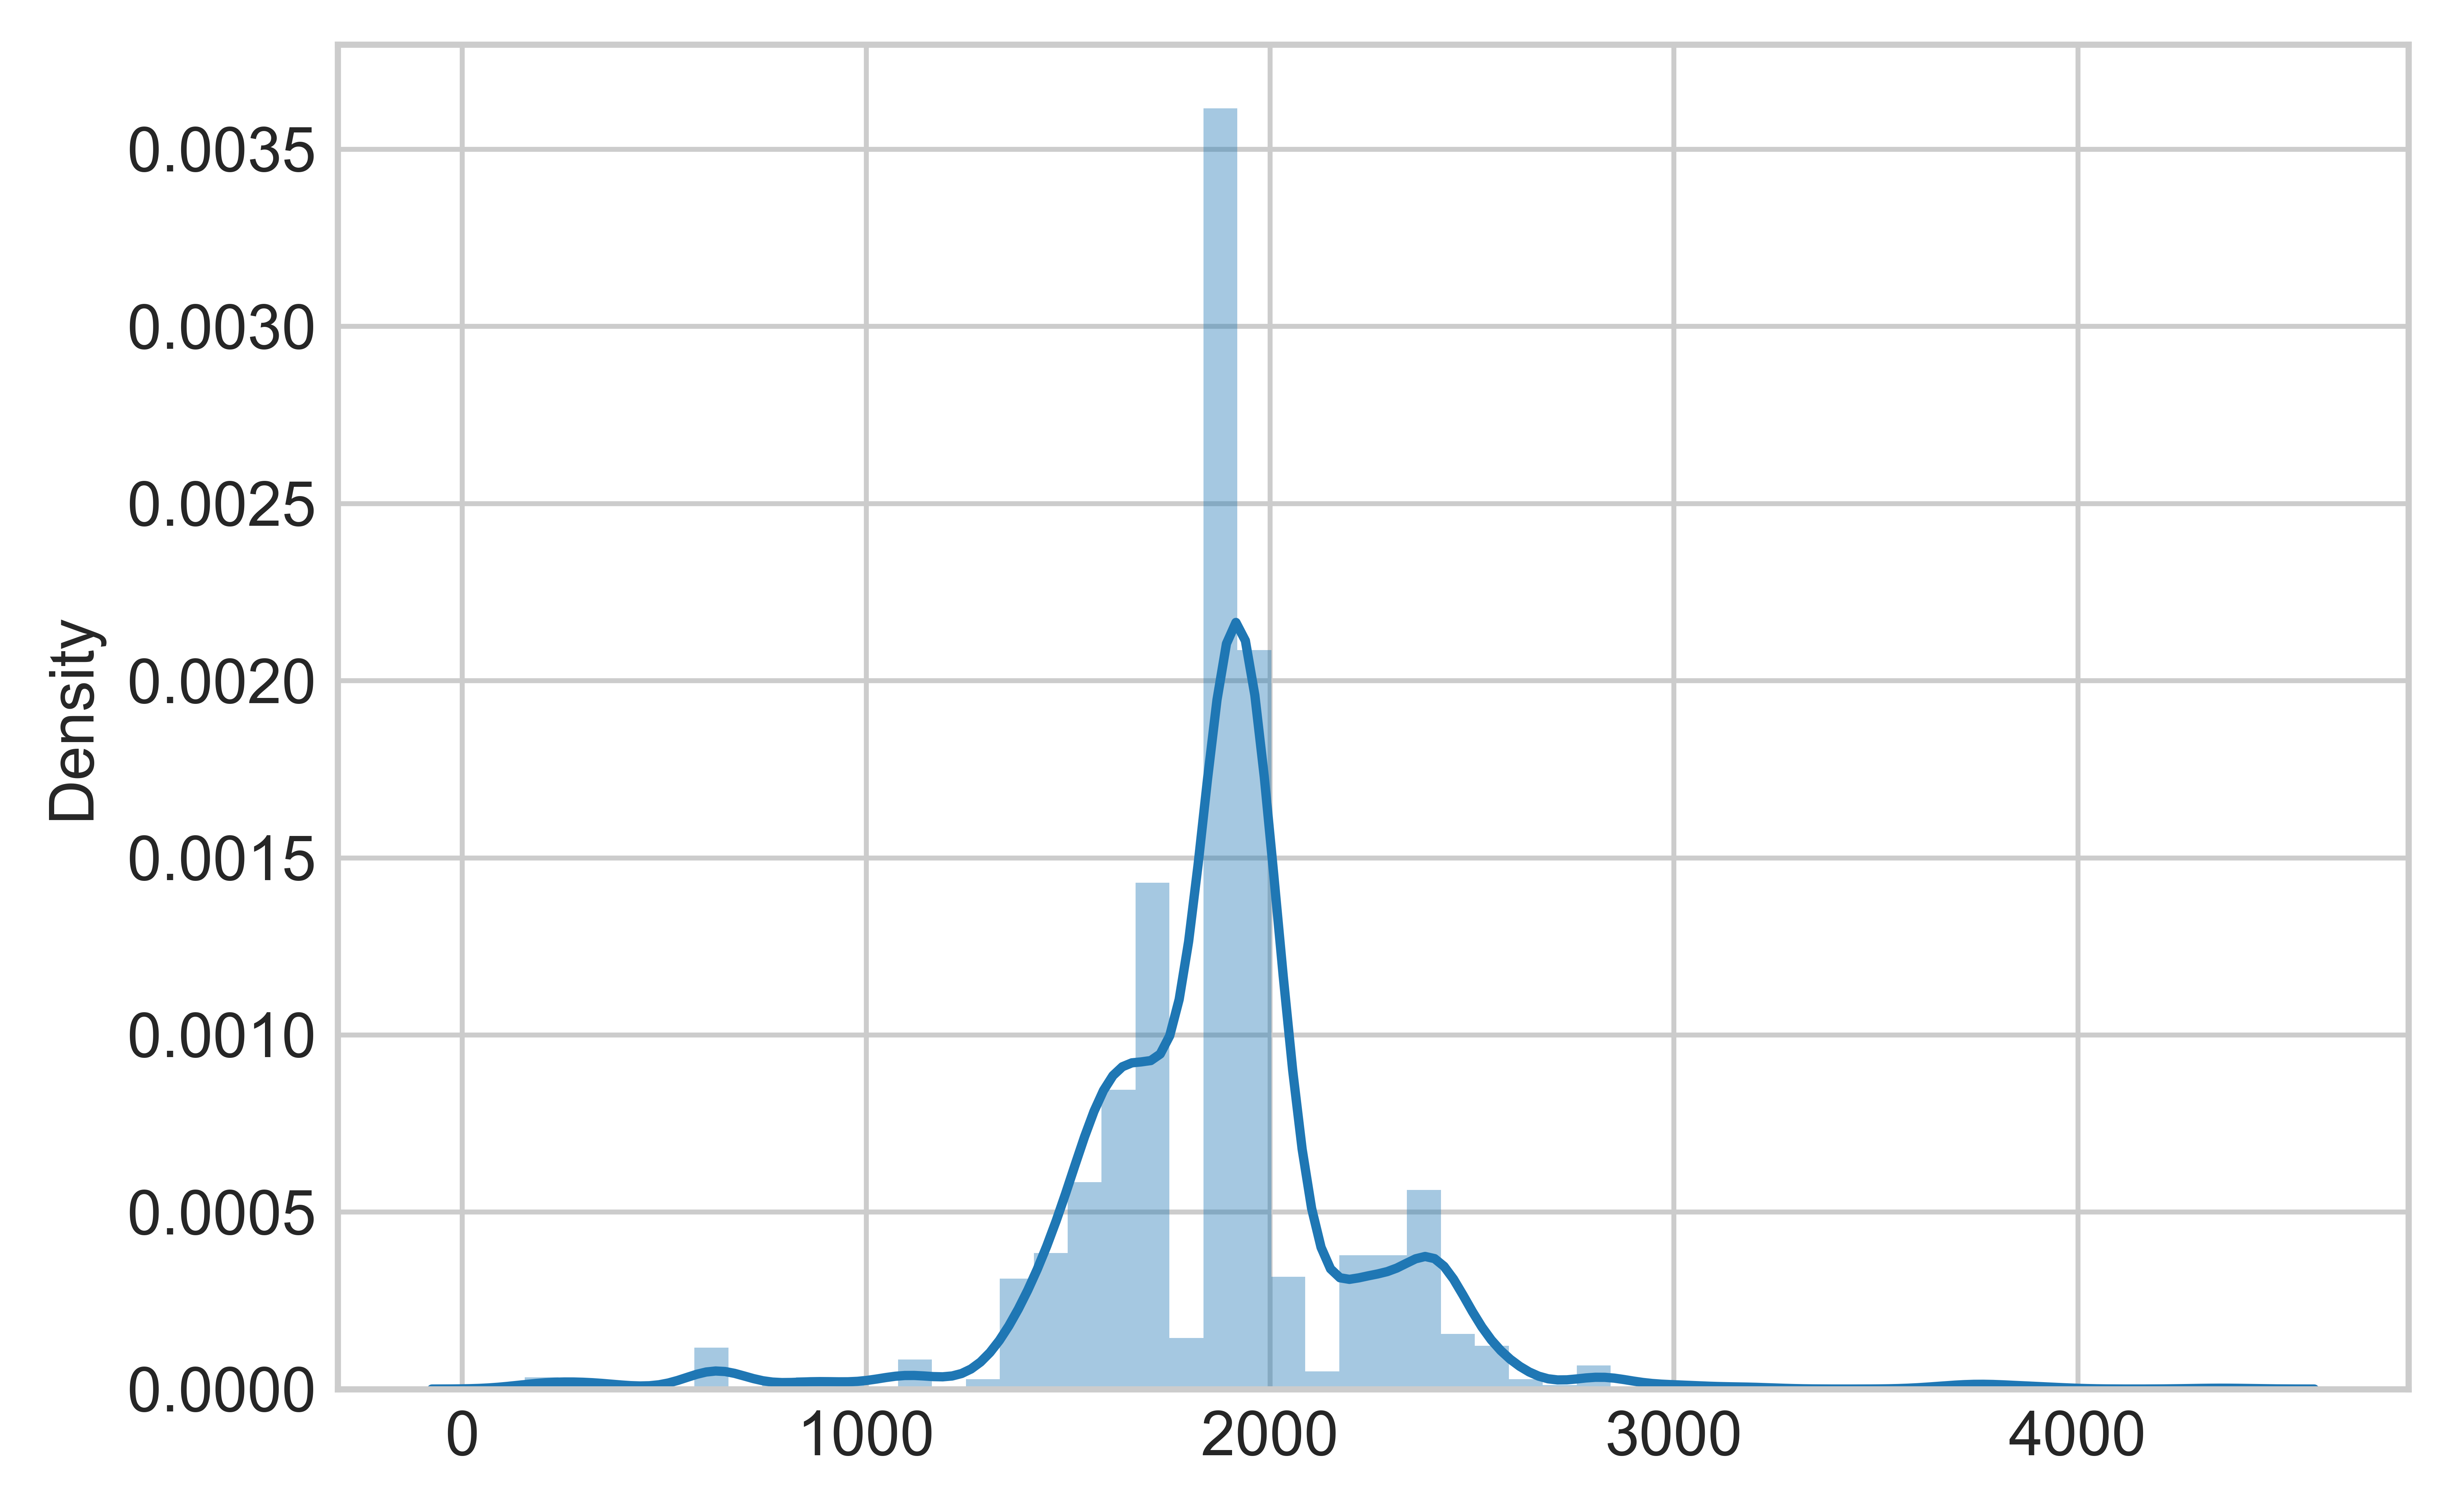

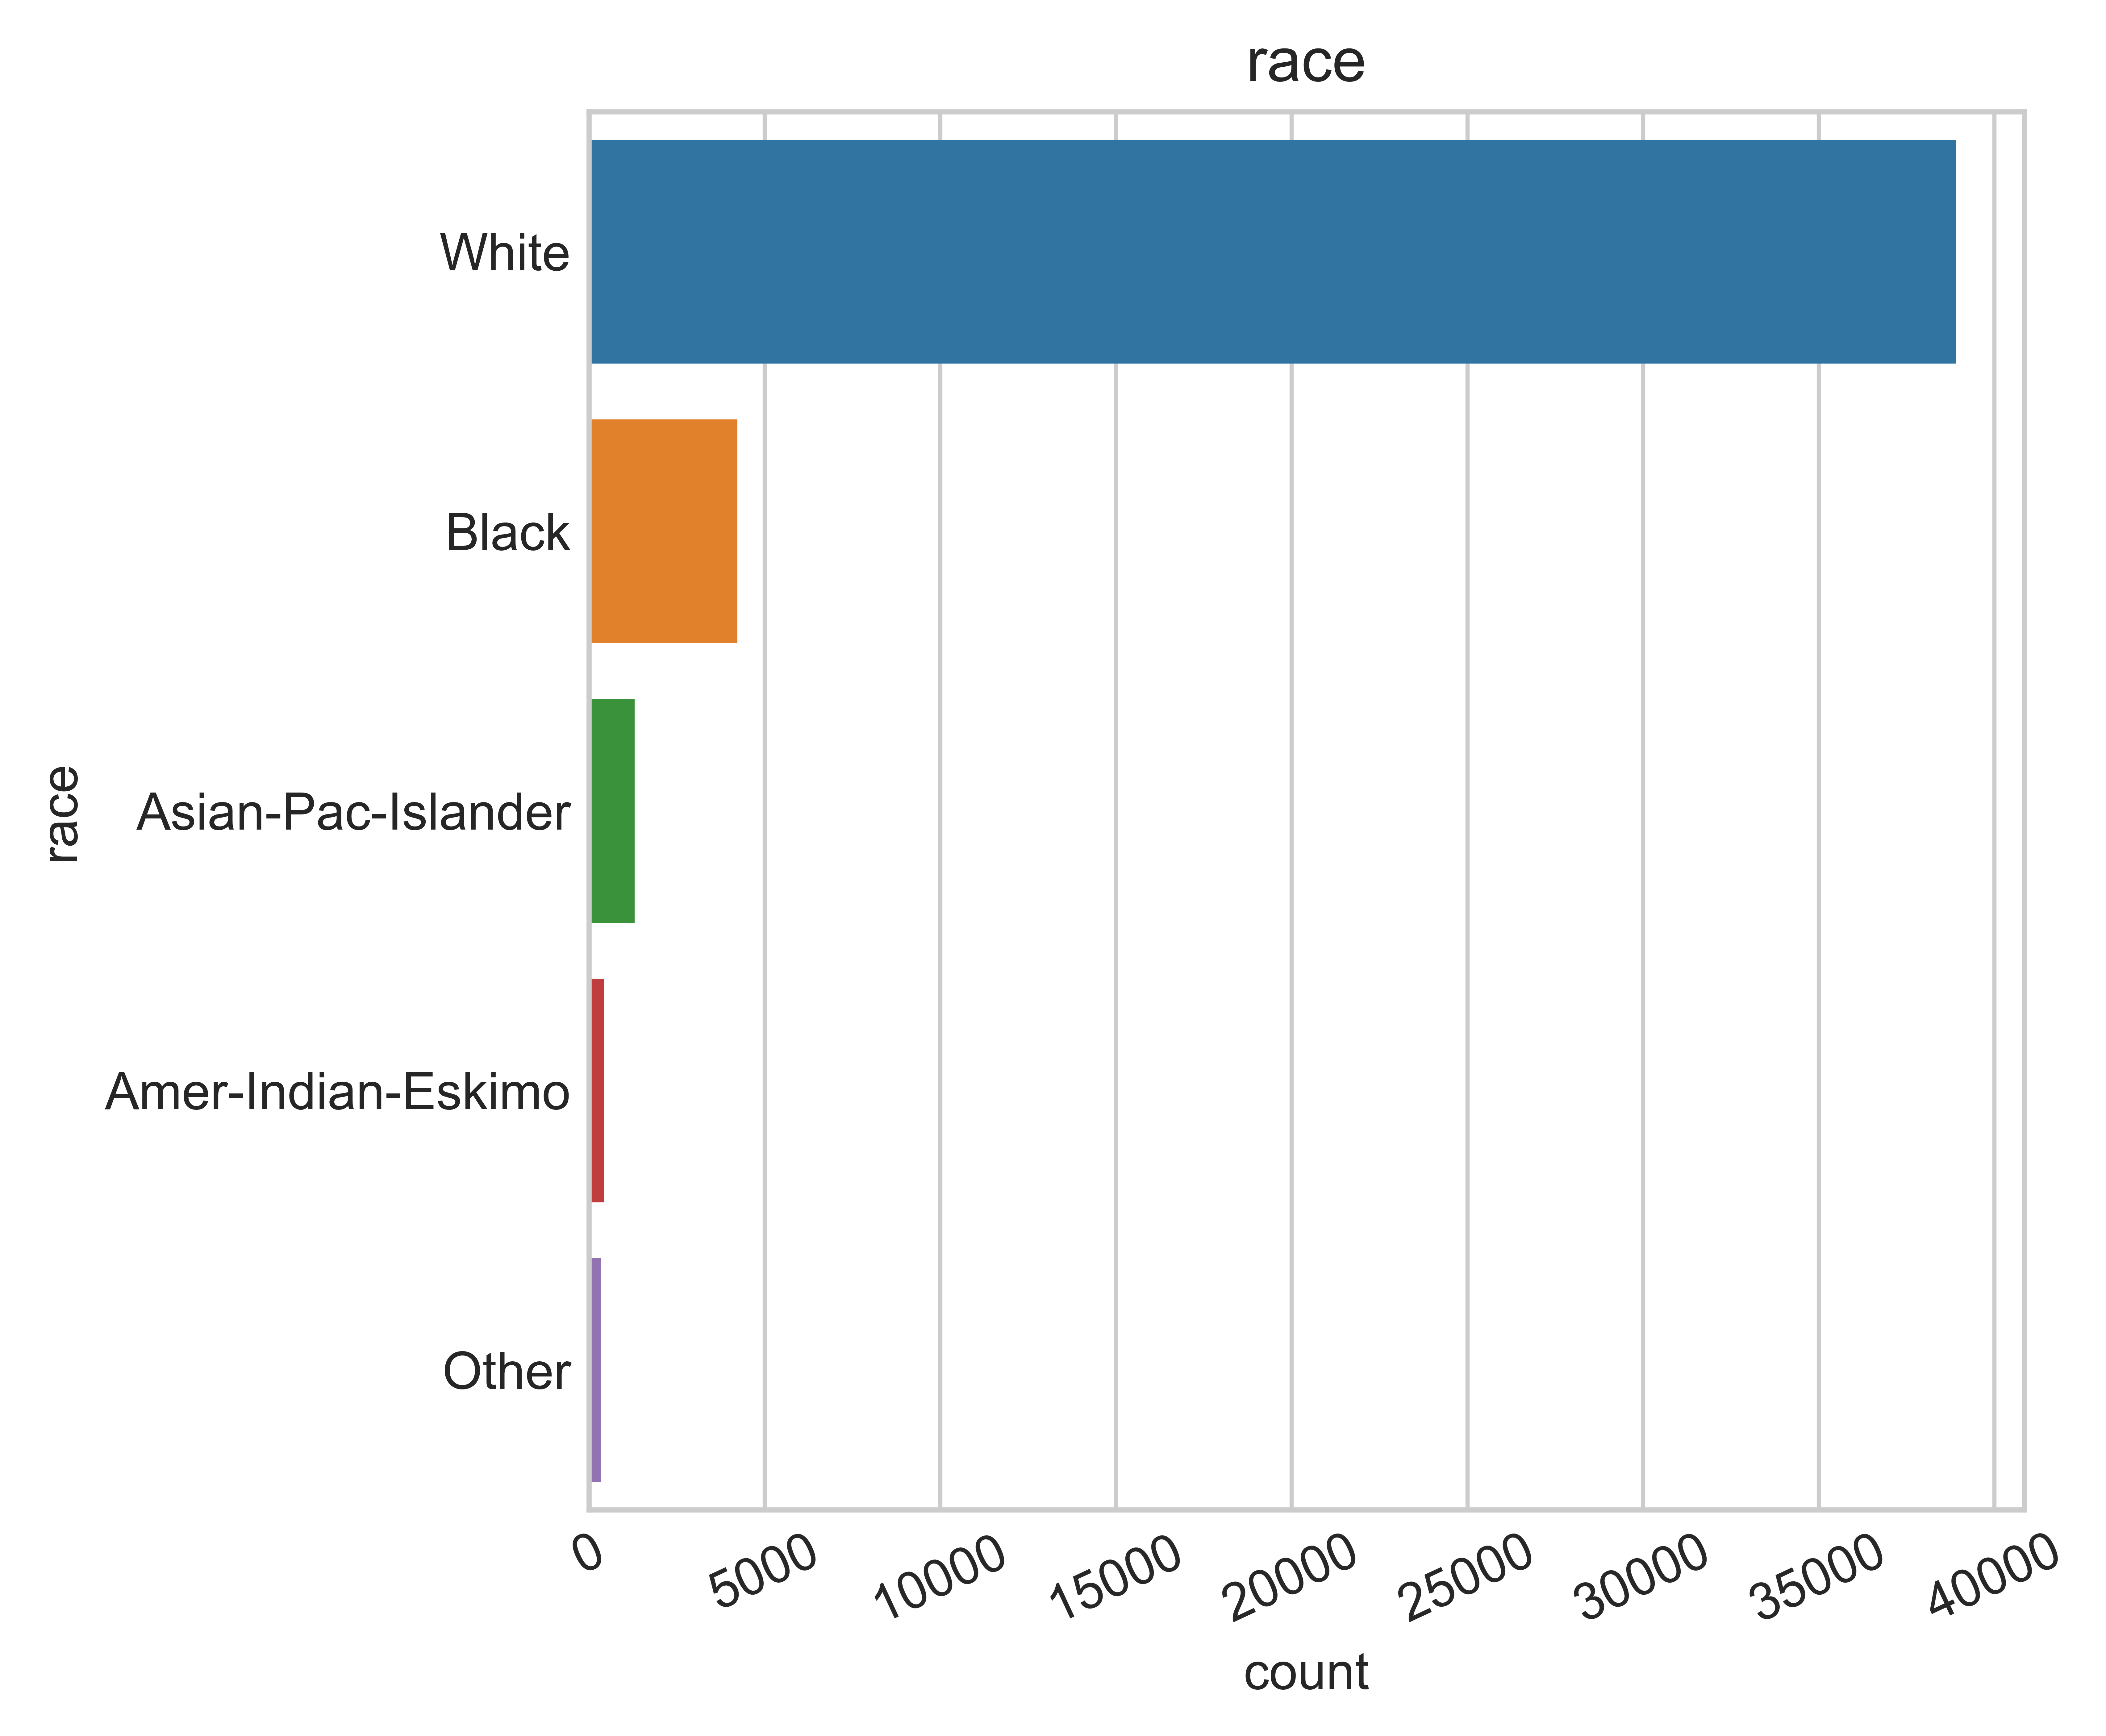

In [7]:
df = dataset_raw[["capital-gain","capital-loss","race"]];
print(df.describe())
plt.style.use('seaborn-whitegrid')
sns.distplot(df[["capital-gain"]][df['capital-gain']>0],kde=True)
plt.show()
sns.distplot(df[["capital-loss"]][df['capital-loss']>0],kde=True)
plt.show()
plot_distribution(df[["race"]],cols=1,width=5,height=5,hspace=0.45,wspace=0.5)

## 4.对native-country探索

In [8]:
#对Native-country进行探索
df = dataset_raw.groupby(["native-country"],as_index=False).size()
df2= dataset_raw.groupby(["native-country","class"],as_index=False).size()
df.insert(df.shape[1],'>50K',0.0)

for idx,r in df.iterrows():
    e = df2[(df2["class"]==">50K") & (df2["native-country"]==r["native-country"])]
    if len(e)>0:
        df.iat[idx,2]=e["size"]/r["size"]

plt.subplots(figsize=(15, 8))
sns.set_style("whitegrid")
sns.barplot(x=df["native-country"],y=df[">50K"])
plt.xticks(rotation=90)
plt.show()

## 5.对education、education-num、marital-status进行探索

In [9]:
df = dataset_raw[["education","education-num","marital-status"]];
print(df.describe())
plot_distribution(df,cols=2,width=10,height=10,hspace=0.45,wspace=0.5)

       education-num
count   45222.000000
mean       10.118460
std         2.552881
min         1.000000
25%         9.000000
50%        10.000000
75%        13.000000
max        16.000000


# 三、特征工程

## 1.将class特征化，>50K设置为1，<=50K设置为0,并用target代替

In [10]:
#特征工程
dataset_raw['class'] = dataset_raw['class'].apply(lambda s:s.strip())
dataset_raw.loc[dataset_raw['class']=='>50K','target'] =1
dataset_raw.loc[dataset_raw['class']!='>50K','target']= 0
dataset_raw.drop(columns='class',inplace=True)
dataset_raw.head()


age         workclass    fnlwgt  education  education-num  \
0  39         State-gov   77516.0  Bachelors           13.0   
1  50  Self-emp-not-inc   83311.0  Bachelors           13.0   
2  38           Private  215646.0    HS-grad            9.0   
3  53           Private  234721.0       11th            7.0   
4  28           Private  338409.0  Bachelors           13.0   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country  target  
0        2174.0           0.0            40.0  United-States     0.0  
1           0.0           0.0            13.0  United-States     0.0  
2           0.0           0.0            40.0  United-States     0.0  
3           0.0           0.0            40.0  United-States     0.0  
4           0.0           0.0            40.0           Cuba     0.0

## 2.离散变量标准化

In [11]:
cat_columns = ['workclass','education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']
num_columns = ['age','fnlwgt','education-num','capital-gain', 'capital-loss', 'hours-per-week']
target_column = "target"
encode_df = dataset_raw.apply(lambda x: pd.factorize(x)[0]) 
X = encode_df.drop(columns=target_column)
Y = encode_df[target_column]
Y = Y.values

## 3.连续变量的标准化

In [12]:
num_mean = X[num_columns].mean() 
num_std = X[num_columns].std()
num_normal = (X[num_columns]-num_mean)/num_std
X = X.drop(columns=num_columns)
X = pd.concat([X,num_normal],axis=1)
X = X.values

# 四、构建模型

## 1.拆分训练数据和测试数据，按0.8系数拆分

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit
strat = StratifiedShuffleSplit(n_splits=2,train_size=0.8)
for train_index, test_index in strat.split(X,Y):
    trainX,testX =X[train_index],X[test_index]
    trainY,testY = Y[train_index],Y[test_index]

## 2.采用DecisionTreeClassifier进行分类

In [14]:
# from sklearn.linear_model import SGDClassifier
# lr =SGDClassifier(loss='log',max_iter = 100)
# lr.fit(trainX,trainY)

from sklearn import tree
lr = tree.DecisionTreeClassifier(max_depth=10,criterion='gini')
lr.fit(trainX, trainY)
pred_test_y = lr.predict(testX)

# 五、评估模型

## 1.用测试数据评估模型

In [22]:
from sklearn.metrics import roc_auc_score,precision_recall_curve,classification_report,roc_curve

pred =lr.predict_proba(testX)[:,1]
pred_labels = lr.predict(testX)
print("准确率:",roc_auc_score(testY,pred))#ROC
print("------------------------------------------------------")#ROC
print(classification_report(testY,pred_labels))#报告

准确率: 0.8859869963440329
------------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.95      0.90      6803
           1       0.77      0.54      0.63      2242

    accuracy                           0.85      9045
   macro avg       0.82      0.74      0.77      9045
weighted avg       0.84      0.85      0.83      9045



## 2.查看PR曲线和AUC曲线

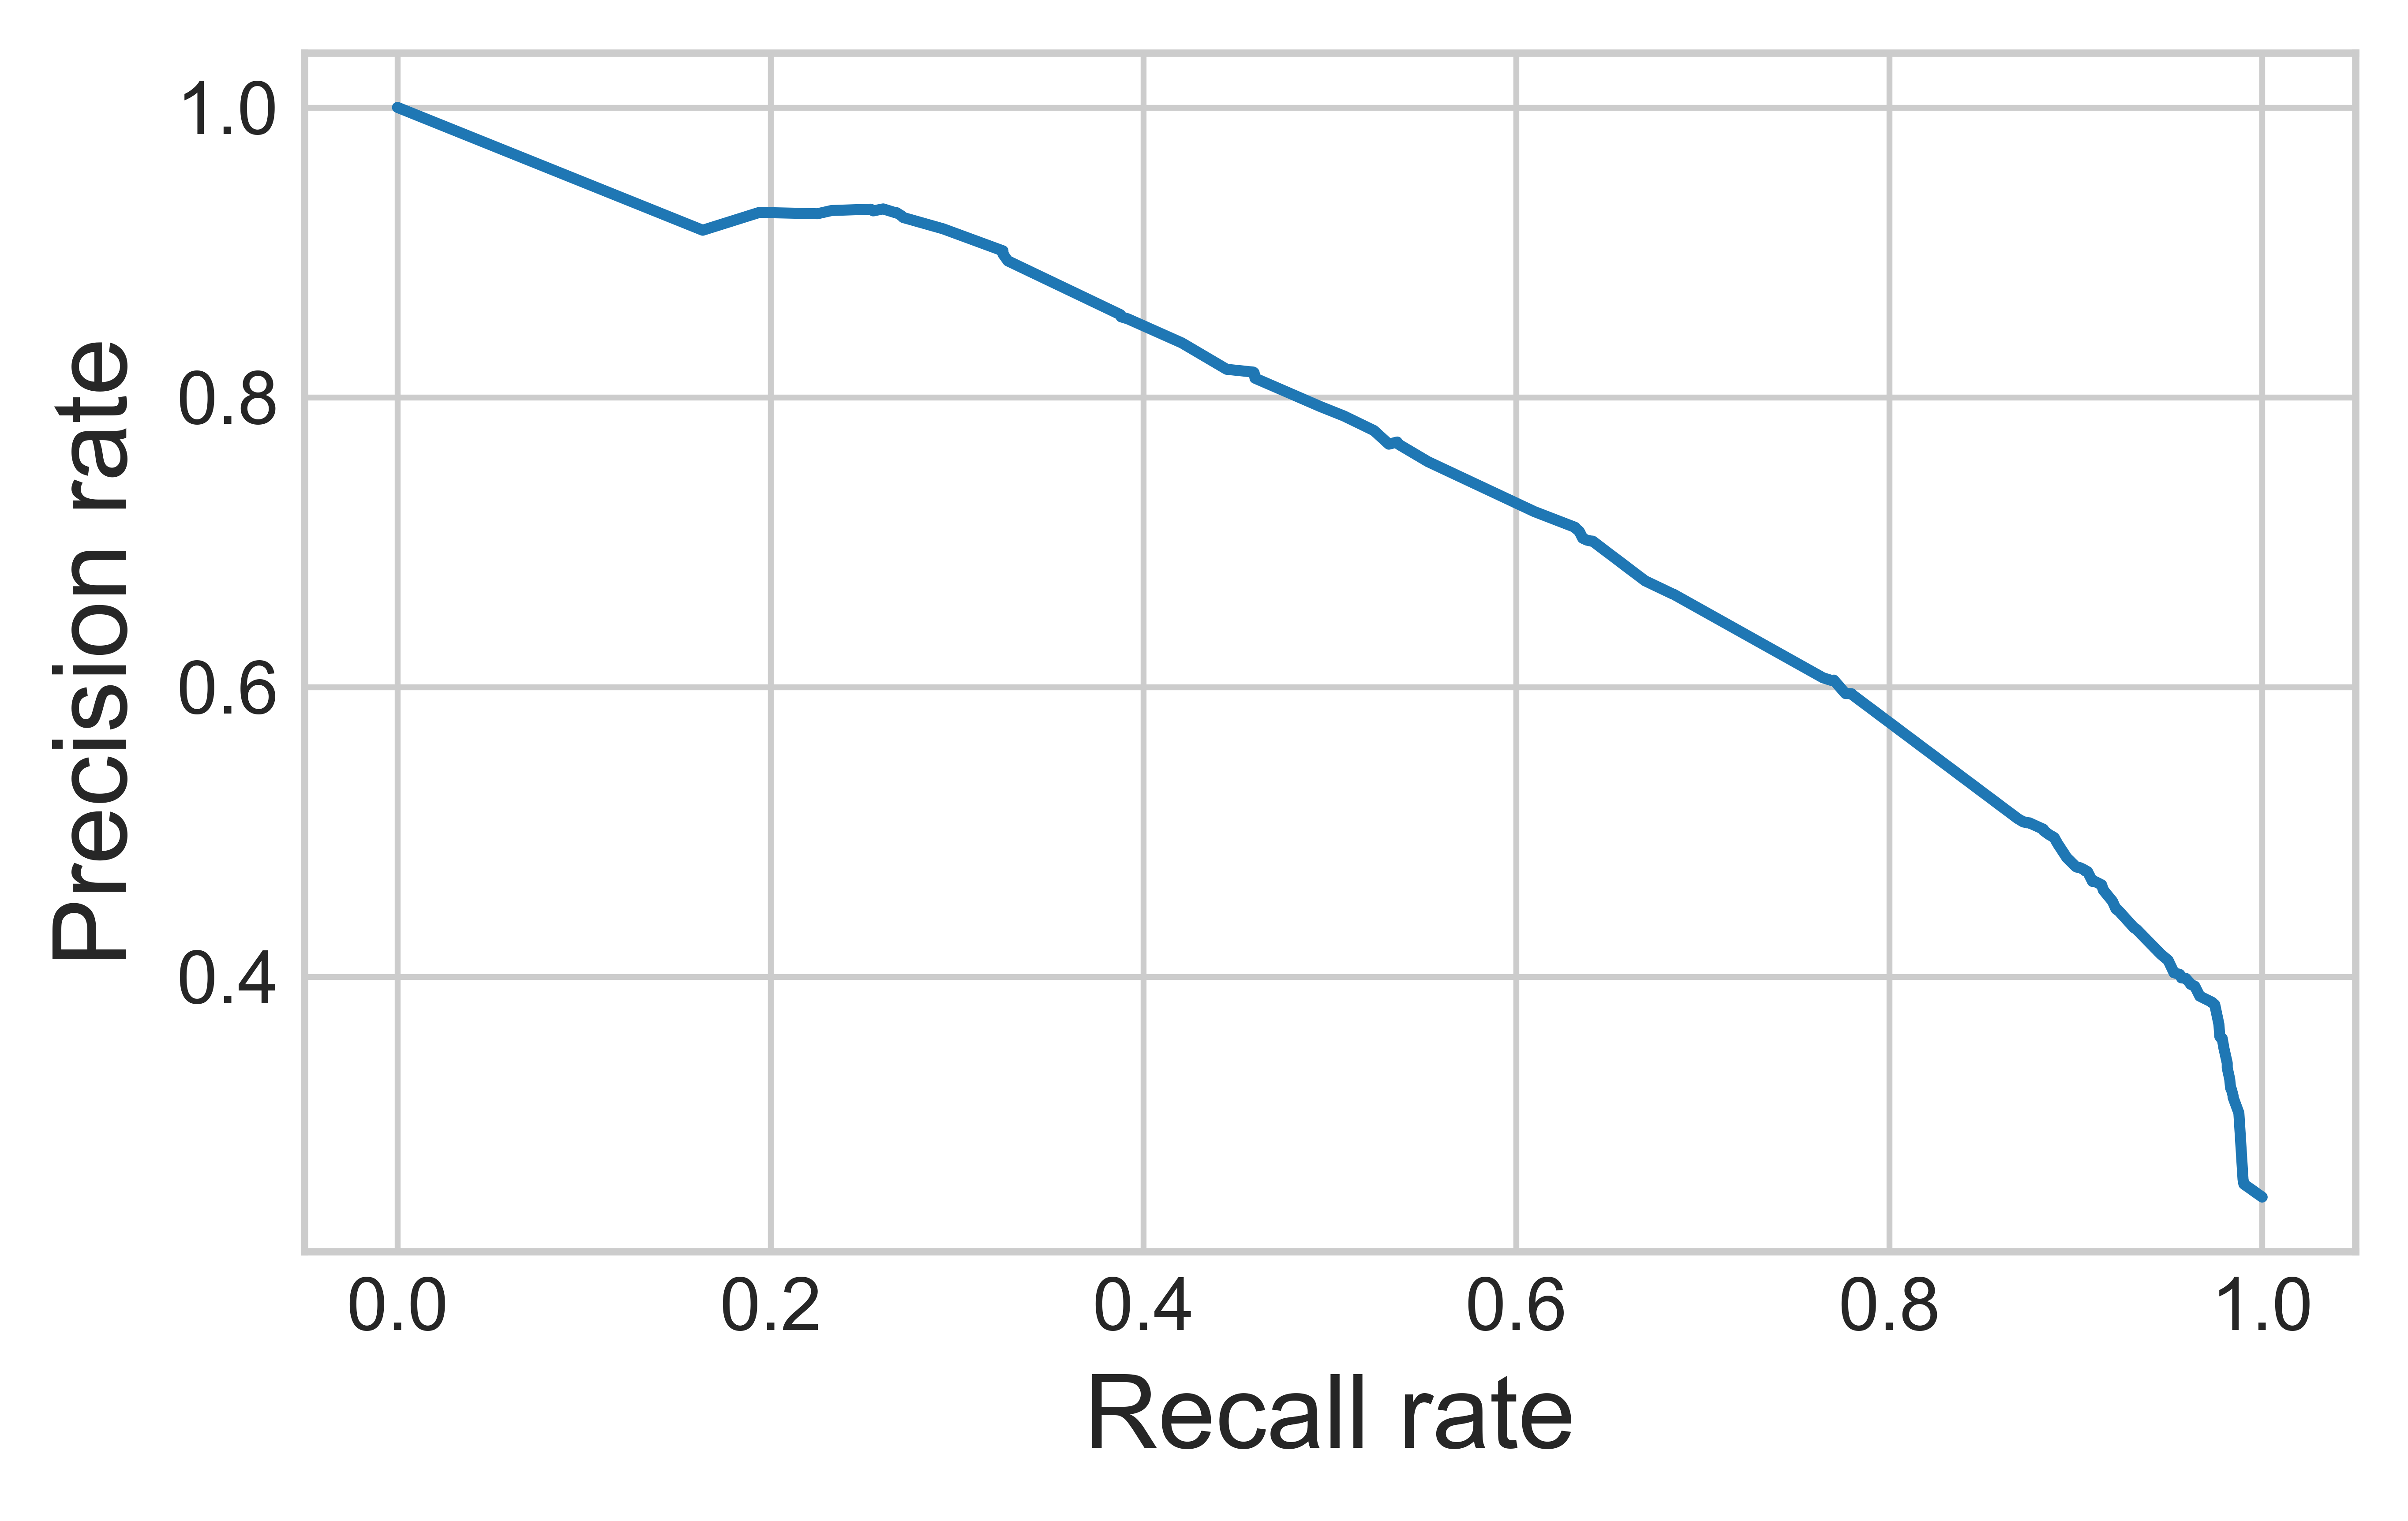

In [16]:
#precision recall curve
precision,recall,_ =precision_recall_curve(testY,pred)
plt.figure(figsize=(5,3))
plt.xlabel("Recall rate",fontsize=14)
plt.ylabel("Precision rate",fontsize=14)
plt.grid(True)
plt.plot(recall,precision)


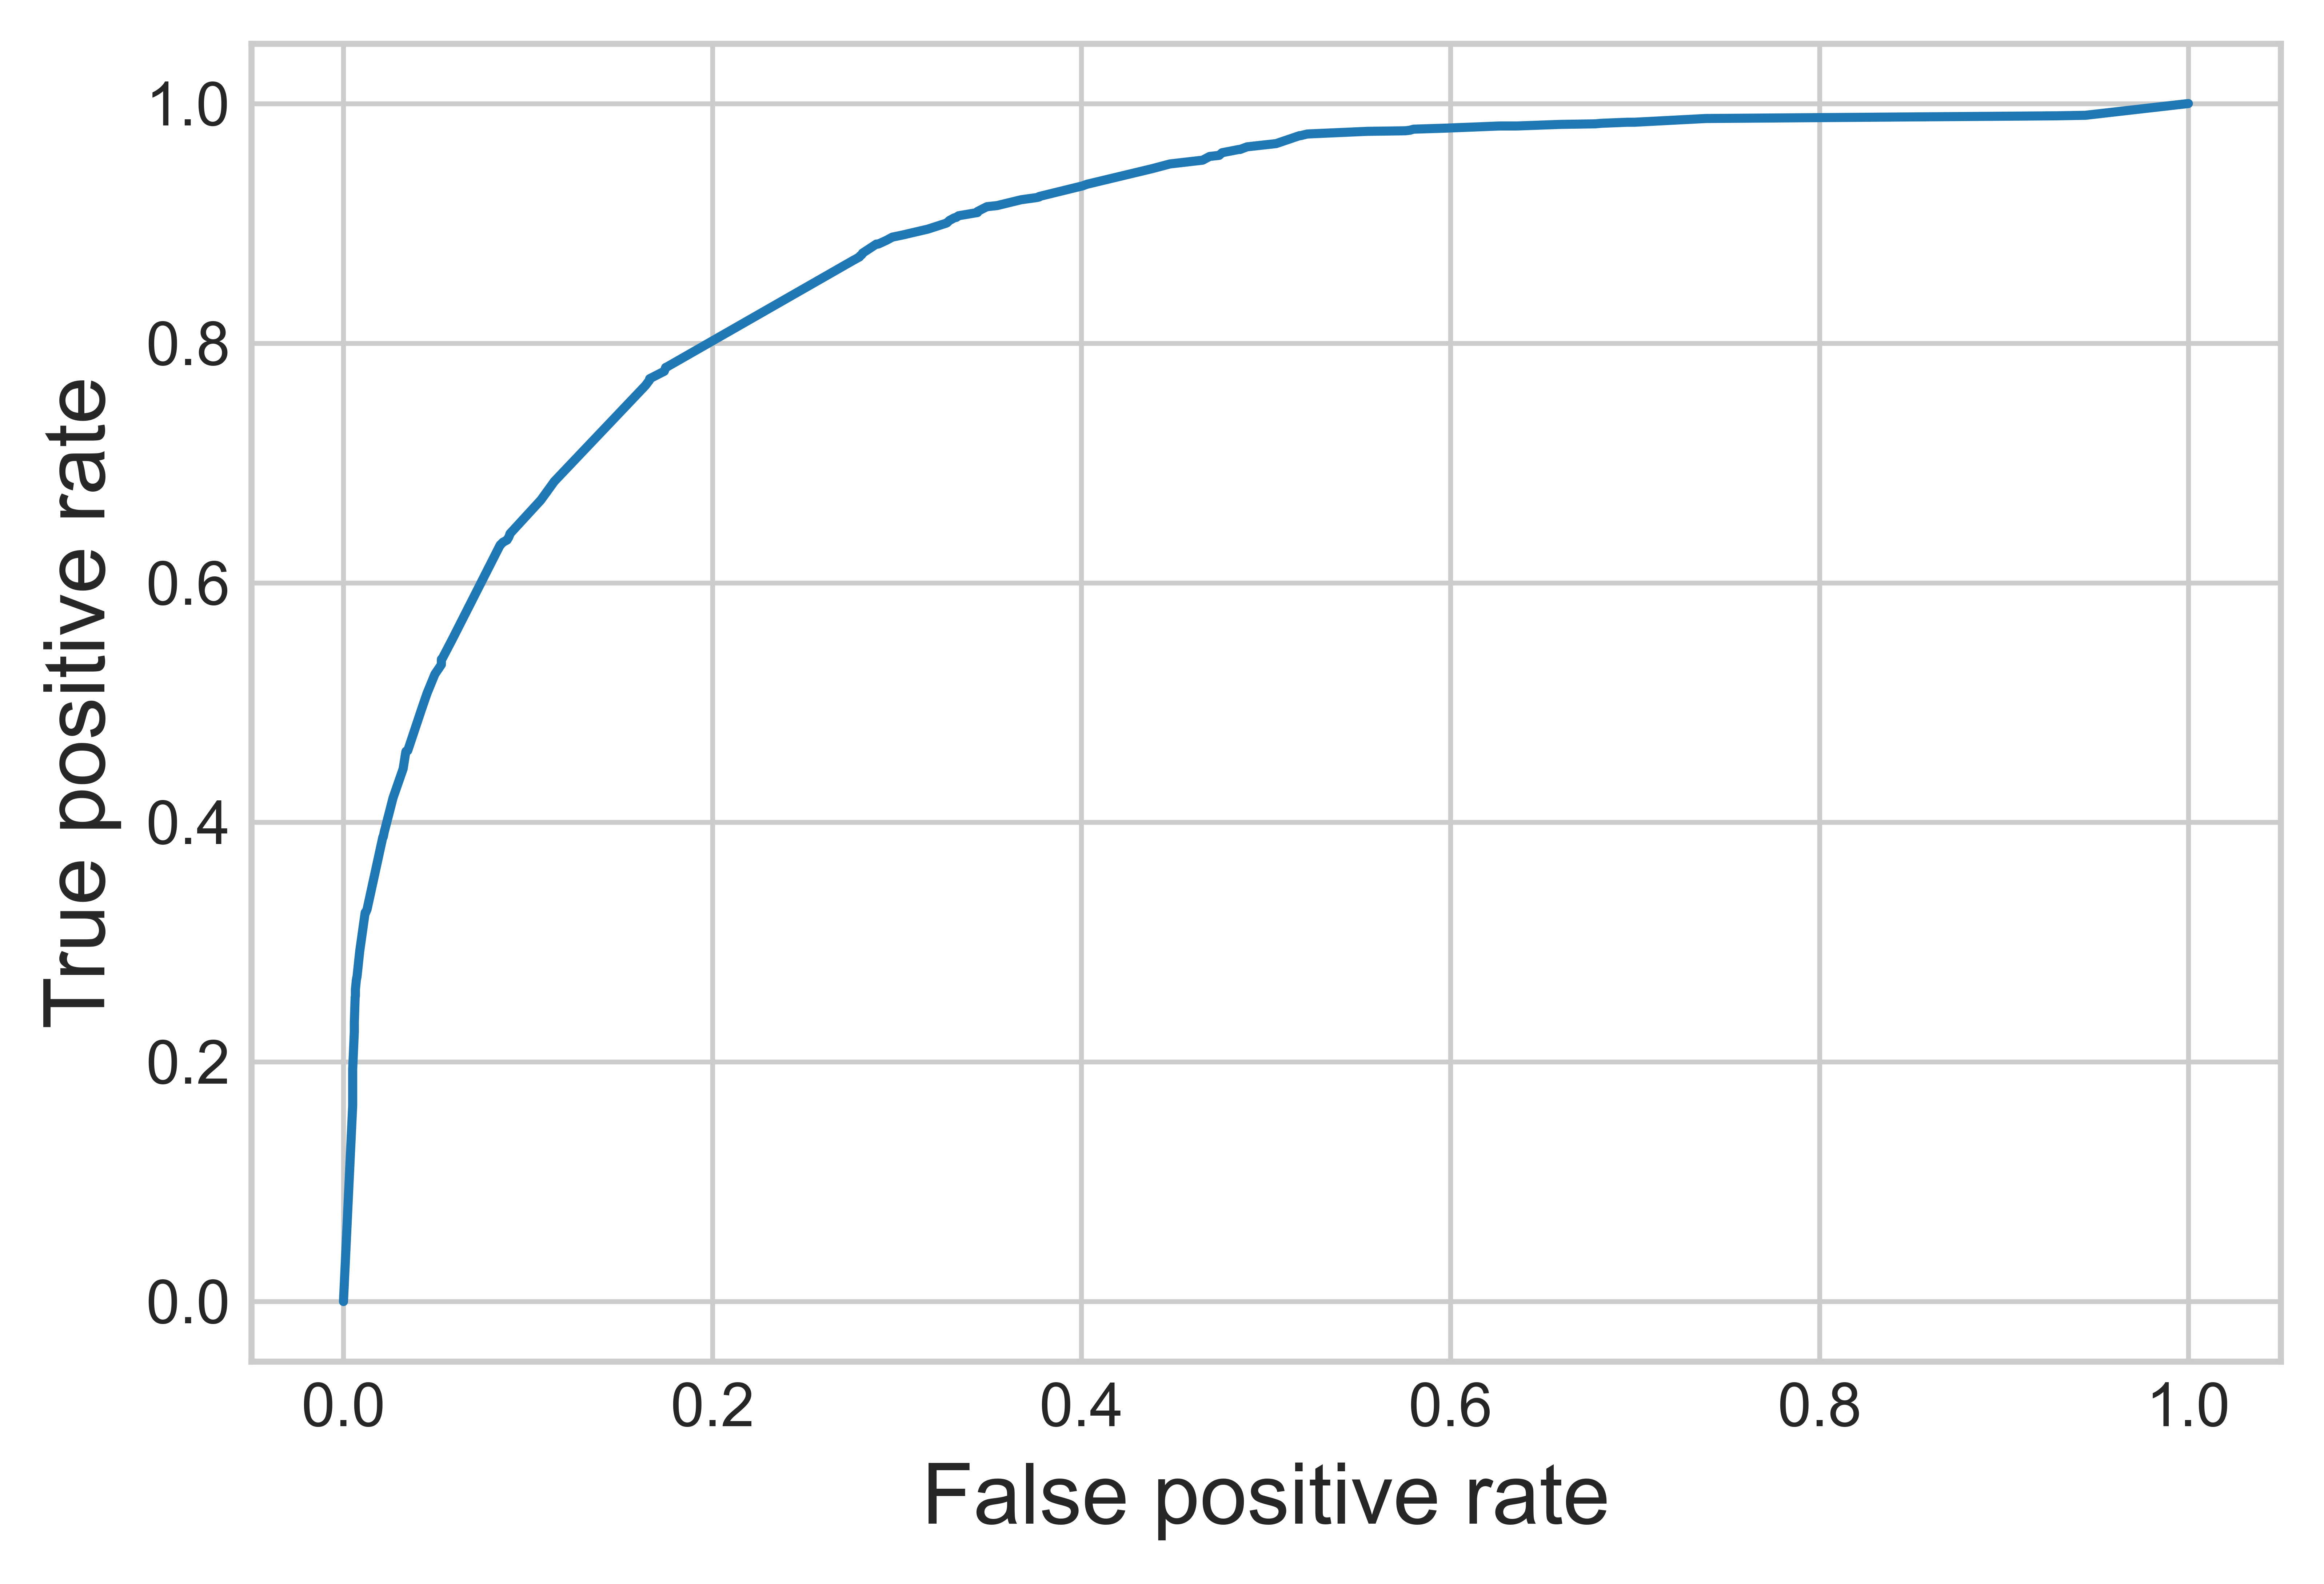

In [17]:
fpr,tpr,_ = roc_curve(testY,pred)
plt.xlabel("False positive rate",fontsize=14)
plt.ylabel("True positive rate",fontsize=14)
plt.grid(True)
plt.plot(fpr,tpr)